# <font color=darkgred>Problem Statement
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each house.

#### Finding the best suited ML model. 
- Our goal is to predict the accrate SalePrice with given features.
- Our models are evaluated on the Root-Mean-Squared-Error (RMSE).

# <font color=darkgreen>Machine Learning models implented in this kernel version:
- Cross Validation: Using 11-fold cross-validation 
- GridSearchCV for tuning hyperparamters and doing cv
- Models:
    - Ridge
    - Lasso
    - Elastic Net
    - XGBoost
    - Extra tree Regressor
    - Bagging Regressor
    - Support vector Regressor(SVR)
    - Gradient Boositng
    - Light GBM
    - StackingCV Regressor
    - To make final predictions, I blended above models predictions together to get more robust predictions.Blending model using best models.


## <font color=darkgreen>Approach:
- <i><b>Data cleaning and statistical analysis.
- Exploratory Data Analysis and visualisations.
- Machine learning modelling and Prediction(Lasso, Ridge, Boosting Algorithms, Blend Models
- Finding the best Machine learning model based on various score

### 1. Data Understanding and Exploration

In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor

In [2]:
#loading data
train= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# Let's look at the number of rows and columns in the dataset
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
# Getting insights of the features and outliers
train.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [6]:
# Summary of the training dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#summary of testing dataset
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
#Checking percentage of null values present in training dataset 
missing_num= train[train.columns].isna().sum().sort_values(ascending=False)
missing_perc= (train[train.columns].isna().sum()/len(train)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_train= missing[missing['Percentage']>0]
missing_train

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [9]:
#Checking percentage of null values present in testing dataset 
missing_num= test[test.columns].isna().sum().sort_values(ascending=False)
missing_perc= (test[test.columns].isna().sum()/len(test)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_test= missing[missing['Percentage']>0]
missing_test

,Total,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127


#### _19 attributes have missing values and 5 features( PoolQC,MiscFeature,Alley,Fence,FireplaceQu) have missing percentage greater than 45%_

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

There are 1460 instances of training data and 1459 of test data. Total number of attributes equals 81 in train data and 80 in `<b>test data excluding SalePrice</b>`, of which 36 is quantitative, 43 categorical + Id and SalePrice.

<b>`Numerical features`</b>: `1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold`

<b>`Categorical features`</b>: `Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,`

In [10]:
numerical = train.select_dtypes(include=['int64','float64']).drop(['SalePrice','Id'],axis=1)
numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [11]:
categorical = train.select_dtypes(exclude=['int64','float64'])
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Plotting Missing value in train and test data

## Function to show values on bar plot

In [12]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

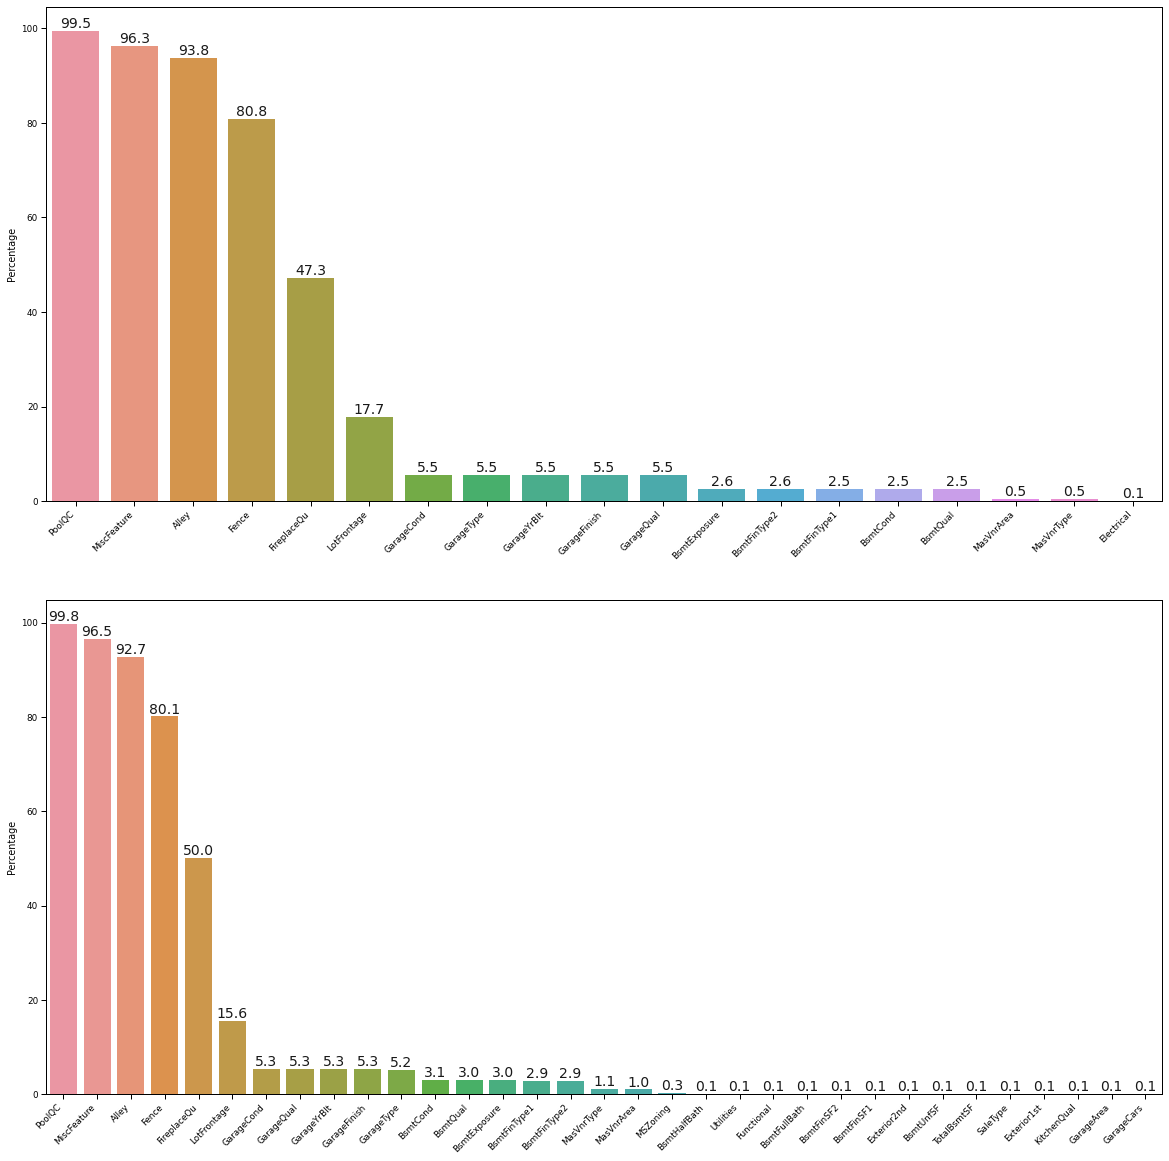

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
ax1=sns.barplot(x=missing_train.index,y='Percentage',data=missing_train)
showvalues(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(2,1,2)
ax2=sns.barplot(x=missing_test.index,y='Percentage',data=missing_test)
showvalues(ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [14]:
# Dropping Id column from train and test test
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [15]:
len(train.select_dtypes(include=['int64','float64']).columns)

37

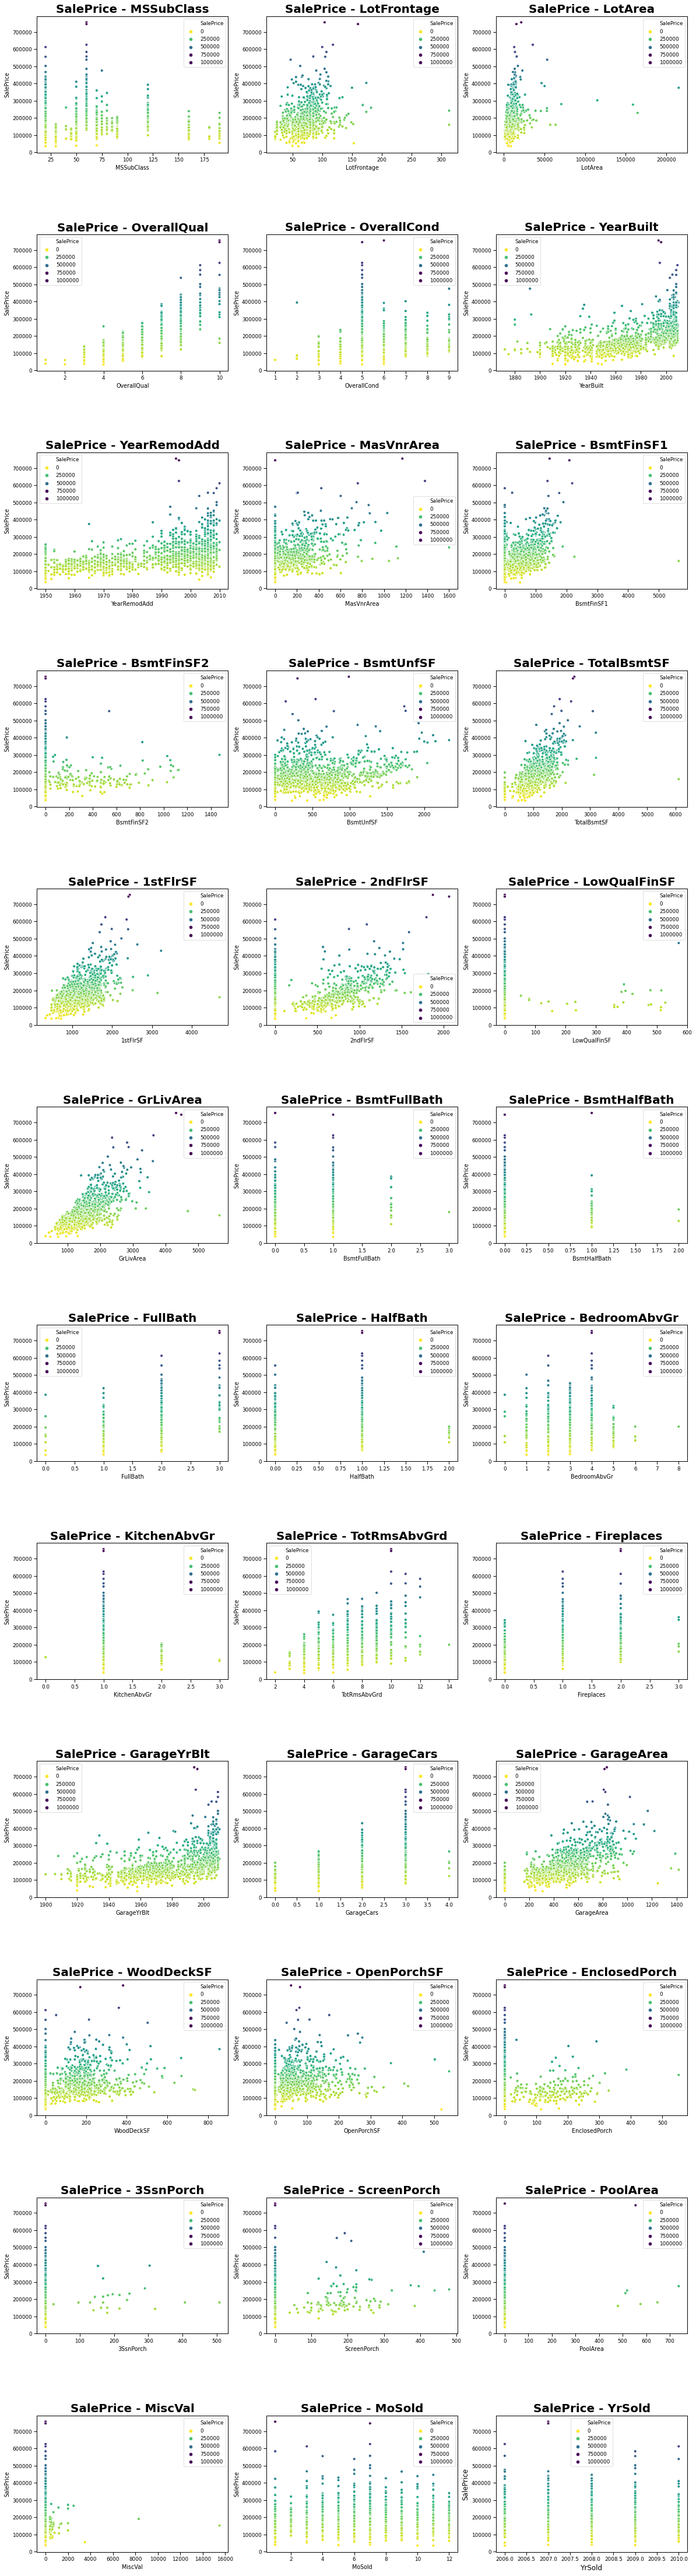

In [16]:
#Visualising numerical predictor variables with Target Variables
train_num = train.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=train_num,ax=ax,palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    #ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

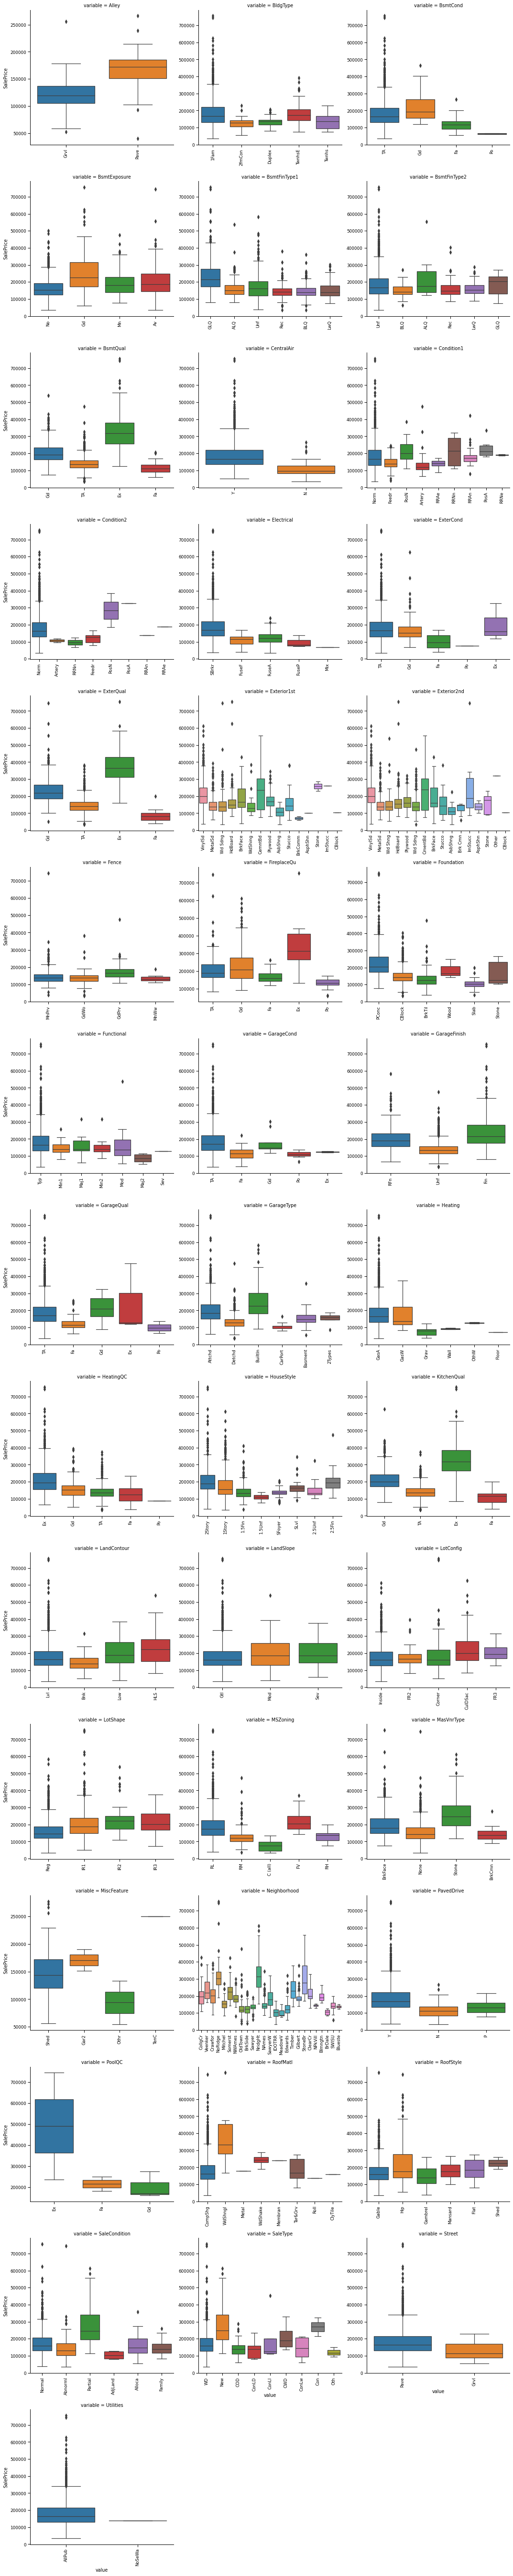

In [17]:
##Visualising Categorical predictor variables with Target Variables
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(train[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

_<b>few observation from boxplots,As we can see,SalePrice for fullbath=3 is higher than 0,1, or 2. SalePrice for OverallQal=10 which is very excellent is higher than others._

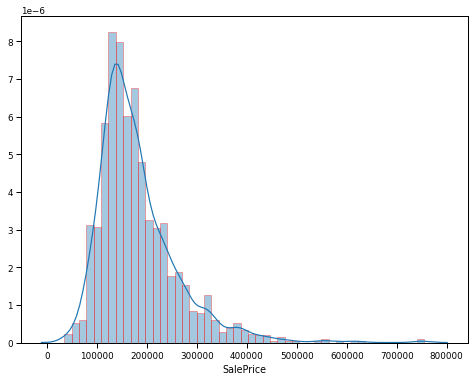

In [18]:
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

#### _<font color=darkred>Inference: SalePrice is not normally distributed, it is positively or right skewed_

In [19]:
# Skew and kurtosis for SalePrice 
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [20]:
#Applying log transformation to remove skewness and make target variable normally distributed
train['SalePrice'] = np.log1p(train['SalePrice'])

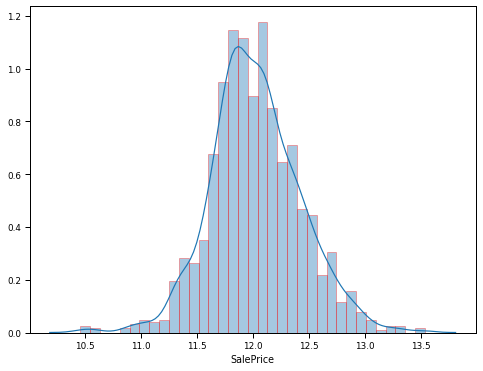

In [21]:
#Plotting graph again to see if its normally distributed or not and see outliers
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

<b>`Now SalePrice is normally distributed`

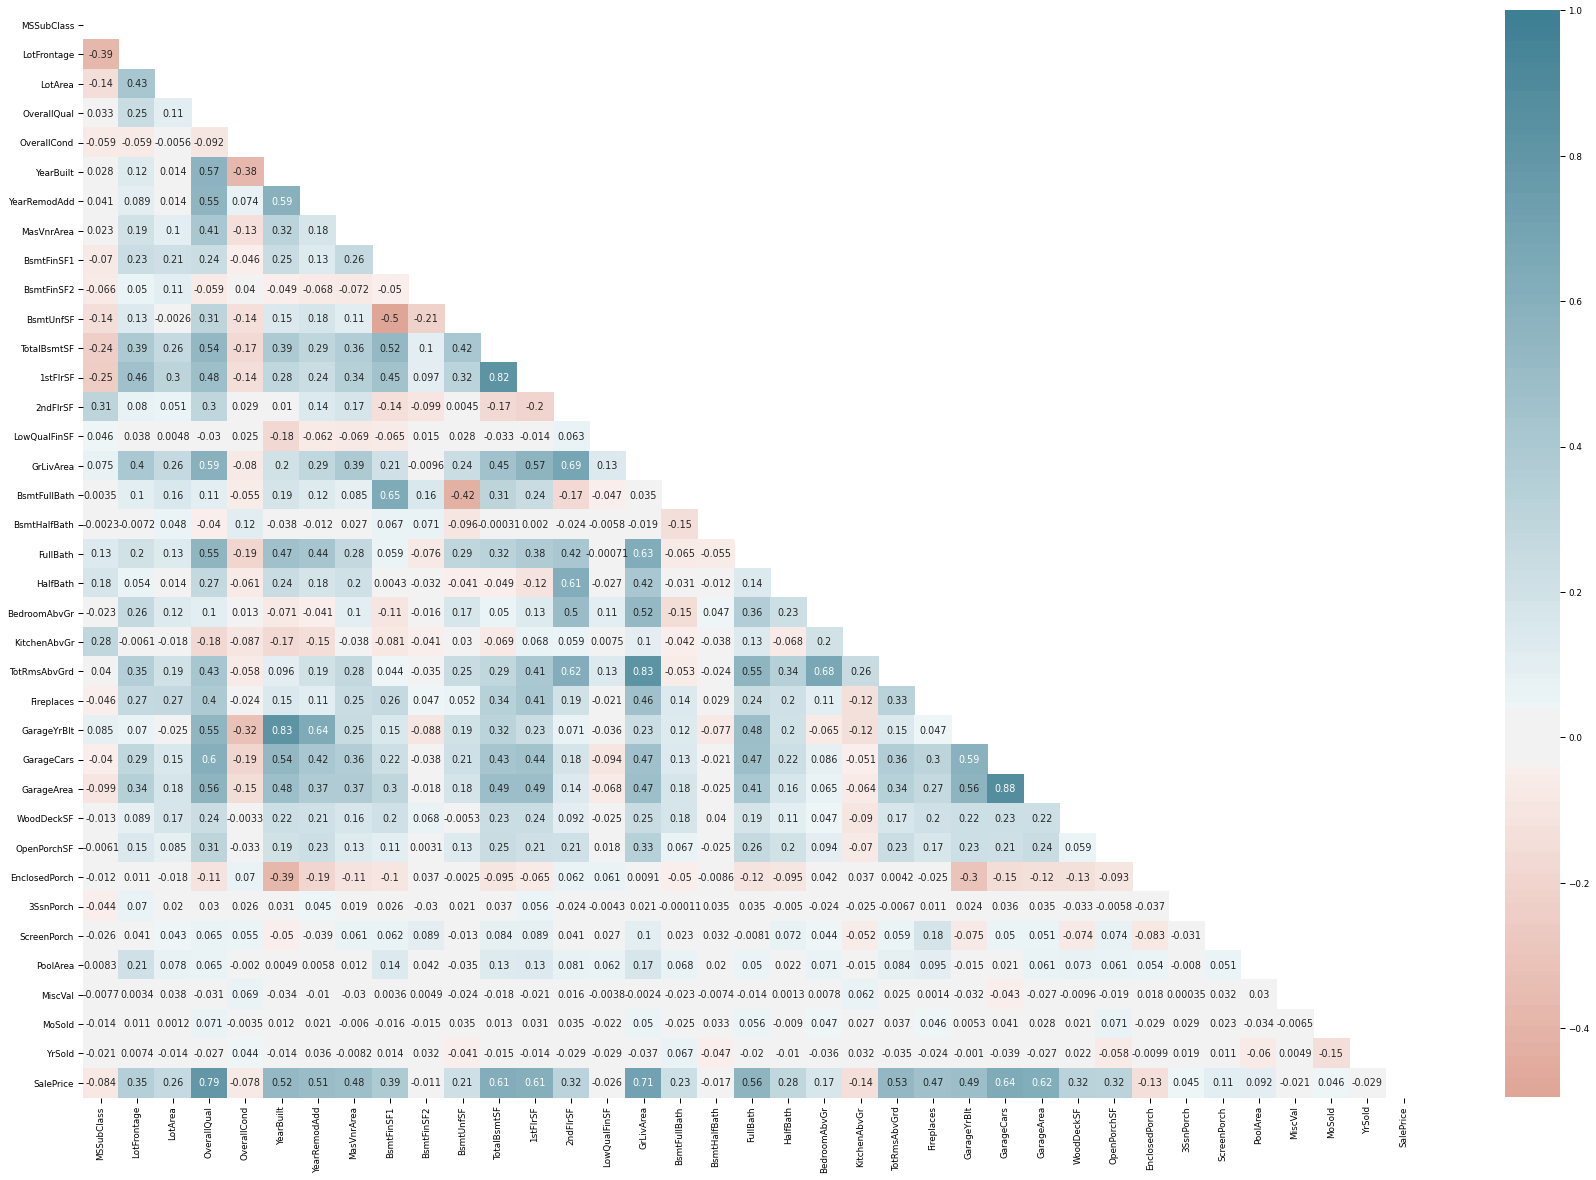

In [22]:
#Correlation between variables to check multicollinearity 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
plt.subplots(figsize = (30,20))
mask = np.zeros_like(train_num.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Plotting heatmap
sns.heatmap(train_num.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0)

_<b>As we can see, the multicollinearity still exists in various features. However, we will keep them for now and let the models(e.g. Regularization models such as Lasso, Ridge) do the clean up later on. Let's go through some of the correlations that still exists._

* There is 0.83 or 83% correlation between **GarageYrBlt** and **YearBuilt**. 
* 83% correlation between **TotRmsAbvGrd** and **GrLivArea**. 
* 89% correlation between **GarageCars** and **GarageArea**. 
* Similarly many other features such as**BsmtUnfSF**, **FullBath** have good correlation with other independent feature.

## 3. Data Preparation 

#### Outlier Treatment

In [23]:
## Deleting those two values with outliers. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)


<b>`Merging train and test data to do handle missing values in both train and test data, handling datatype issues, skewness and transformation.`

In [24]:
y=train['SalePrice']
train_df=train.drop('SalePrice',axis=1)
test_df = test
df_all= pd.concat([train_df,test_df]).reset_index(drop=True)

In [25]:
df_all['age']=df_all['YrSold']-df_all['YearBuilt']
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
#will convert those columns into dummy variables later.
df_all[['MSSubClass']] = df_all[['MSSubClass']].astype(str) 
df_all['YrSold'] = df_all['YrSold'].astype(str) #year
df_all['MoSold'] = df_all['MoSold'].astype(str) #month


#### Handling Missing Values for 19 features which have missing values mentioned above

In [26]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
df_all['Functional'] = df_all['Functional'].fillna('Typ')
df_all['Electrical'] = df_all['Electrical'].fillna('SBrkr') #Filling with modef
# data description states that NA refers to "No Pool"
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
# Replacing the missing values with 0, since no garage = no cars in garage inferred from data dictionary
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['KitchenQual'] = df_all['KitchenQual'].fillna("TA")
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])
# Replacing the missing values with None inferred from data dictionary 
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_all[col] = df_all[col].fillna('None')
# Replacing the missing values with None 
# NaN values for these categorical basement df_all, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_all[col] = df_all[col].fillna('None')
#Replacing missing value it with median beacuse of outliers
df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# Replacing the missing values with None 
# We have no particular intuition around how to fill in the rest of the categorical df_all
# So we replace their missing values with None
objects = []
for i in df_all.columns:
    if df_all[i].dtype == object:
        objects.append(i)
df_all.update(df_all[objects].fillna('None'))

numeric_dtypes = [ 'int64','float64']
numerics = []
for i in df_all.columns:
    if df_all[i].dtype in numeric_dtypes:
        numerics.append(i)
df_all.update(df_all[numerics].fillna(0))

df_all['MSZoning'] = df_all.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [27]:
#Checking percentage of null values present in dataset 
missing_perc= (df_all[df_all.columns].isna().sum()/len(df_all)*100).sort_values(ascending=False)
print(missing_perc[missing_perc>0].sum()) #No missing values


0.0


#### Handling Skewness in predictor variables

Why we are removing Skewness from our model and predictor variables?
- For coefficients to be interpretable, linear regression assumes a bunch of things. 
    - `Homoscedasticity`( i.e. The errors your model commits should have the same variance) and error terms should be `normally distributed`.
    - Following the linear regression assumptions is important if you want to either `interpret the coefficients` and can be used in business goals.
    - When the dependent variable is as skewed as our data is, the residuals usually will be too. Hence, we are `handling skewness` in our data.
    - <b>This model will then be used to understand how exactly the prices vary with the variables`.

In [28]:
# We have already removed skewness from target variable (SalePrice) and made it normally distributed.
# Lets find out if numerical predictor variables are largely skewed or not
df_all_num = df_all.select_dtypes(include=['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
LotFrontage       1.103039
GrLivArea         1.068750
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
age               0.598015
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

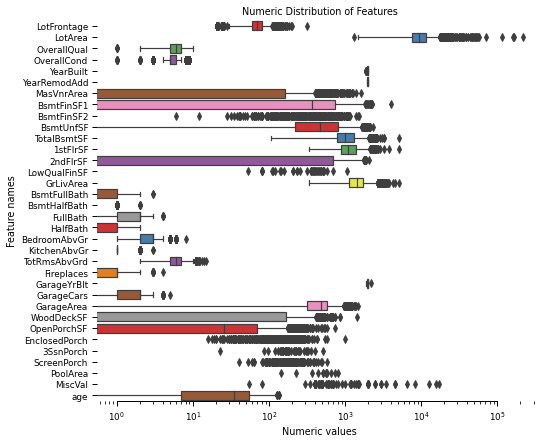

In [29]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all_num , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [30]:
# Normalize skewed features using a Box-Cox power transformation, we can use other techniques but am using boxpox
# as it works very well on this dataset
for i in skew_index:
    df_all[i] = boxcox1p(df_all[i], boxcox_normmax(df_all[i] + 1.002))

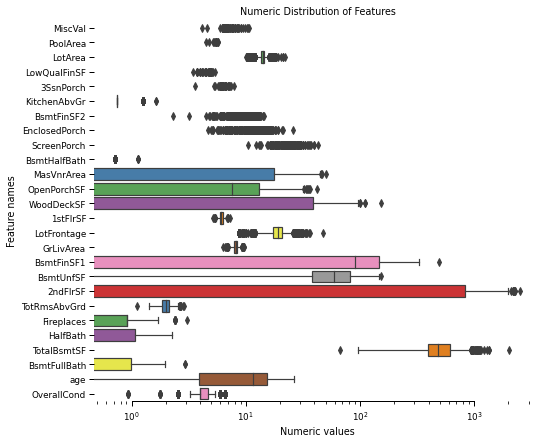

In [31]:
# Let's make sure we handled all the skewed values
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

<b>Features are looking normally distributed now, not much skewness in the distribution of predictor variables.

### Creating Derived features from raw attributes

In [32]:
#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_all['Utilities'].value_counts())
#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_all['Street'].value_counts())
#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_all['PoolQC'].value_counts())

AllPub    2914
None         2
NoSeWa       1
Name: Utilities, dtype: int64
Pave    2905
Grvl      12
Name: Street, dtype: int64
None    2908
Ex         4
Gd         3
Fa         2
Name: PoolQC, dtype: int64


In [33]:
df_all=df_all.drop(['Utilities', 'Street', 'PoolQC'], axis=1) # not useful df_all, evident from above
# vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df_all['YrBltAndRemod']=df_all['YearBuilt']+df_all['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df_all['Total_sqr_footage'] = (df_all['BsmtFinSF1'] + df_all['BsmtFinSF2'] +
                                 df_all['1stFlrSF'] + df_all['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df_all['Total_Bathrooms'] = (df_all['FullBath'] + (0.5 * df_all['HalfBath']) +
                               df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']))
#Creating derived column for total porch area 
df_all['Total_porch_sf'] = (df_all['OpenPorchSF'] + df_all['3SsnPorch'] + df_all['EnclosedPorch'] + \
                              df_all['ScreenPorch'] + df_all['WoodDeckSF'])


In [34]:
df_all['has_pool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_2ndfloor'] = df_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_garage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_bsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_fireplace'] = df_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_openporch'] =df_all['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_wooddeck'] =df_all['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_enclosedporch'] = df_all['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_3ssnporch']=df_all['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_openporch'] = df_all['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_screenporch'] = df_all['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)



In [35]:
#<-------------------------- Check Again ----------------------->
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_all['2ndFlrSF'] = df_all['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)



### Creating more derived feature by doing log transormation

In [36]:
def log_transform(result, features):
    m = result.shape[1]
    for feature in features:
        result = result.assign(newcol=pd.Series(np.log(1.01+result[feature])).values)   
        result.columns.values[m] = feature + '_log'
        m += 1
    return result

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']

df_all = log_transform(df_all, log_features)

#### Creating dummy variables for categorical and object variables

In [37]:
df_all_num= df_all.select_dtypes(include=['float64','int64']).columns  # Numerical columns
df_all_temp = df_all.select_dtypes(exclude=['float64','int64']) # selecting object and categorical features only
df_all_dummy= pd.get_dummies(df_all_temp)
df_all=pd.concat([df_all,df_all_dummy],axis=1) # joining converted dummy feature and original df_all dataset
df_all= df_all.drop(df_all_temp.columns,axis=1) #removing original categorical columns
df_all.shape

(2917, 368)

In [38]:
X= df_all[:len(train)] #converted into train data
Z_test= df_all[len(train):] #test data
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',Z_test.shape)  #test set shape

Train Data Shape: (1458, 368)
Test Data Shape: (1459, 368)


In [39]:
#based on describe method and scatter plot, removing outliers
outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']

def drop_outliers(x):
    list = []
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   
X = drop_outliers(X)
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])
print(X.shape)

(1453, 368)


<b>`For each feature, it counts the values of that feature. If the most recurrent value of the feature is repeated almost in all the instances (*zeros / len(X) * 100 > 99.94*). Then it drops these features because their values are almost the same for all instances and will not help in learning process and those features are not useful in our prediction.`

In [40]:
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99.94:
            redundant.append(i)
    redundant = list(redundant)
    return redundant


redundant_features = redundant_feature(X)

X = X.drop(redundant_features, axis=1)
Z_test = Z_test.drop(redundant_features, axis=1)

In [41]:
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',Z_test.shape)  #test set shape

Train Data Shape: (1453, 366)
Test Data Shape: (1459, 366)


### Cross Validation

In [42]:
kfold= KFold(n_splits=11,random_state=42,shuffle=True) #kfold cross validation

In [43]:
# Error function to compute error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#Assigning scoring paramter to 'neg_mean_squared_error' beacause 'mean_squared_error' is not 
# available inside cross_val_score method
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

### Splitting data into train and test set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1017, 366)
(1017,)
(436, 366)


# RIDGE (L2 regularization)

####  _Robust Scaler: Used when have outliers and dont wnat them to have much influence. Robust scaler standardizes a feature by removing the median and dividing each feature by Interquartile Range. Outliers have less influence than Minmaxscaler. range is larger than Minmax scaler and Standard Scaler_

In [46]:
ridge=Ridge()
params= {'alpha': [5,8,10,10.1,10.2,10.3,10.35,10.36,11,12,15]}
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
grid_ridge=GridSearchCV(ridge, param_grid=params,cv=kfold,scoring='neg_mean_squared_error')
grid_ridge.fit(X_train,y_train)
alpha = grid_ridge.best_params_
ridge_score = grid_ridge.best_score_
print("The best alpha value found is:",alpha['alpha'],'with score:',ridge_score)

ridge_alpha=Ridge(alpha=alpha['alpha'])
ridge_alpha.fit(X_train,y_train)
y_pred_train=ridge_alpha.predict(X_train)
y_pred_test=ridge_alpha.predict(X_test)

print('RMSE train = ',rmsle(y_train,y_pred_train))
print('RMSE test = ',rmsle(y_test,y_pred_test))

The best alpha value found is: 10.36 with score: -0.010956104701329501
RMSE train =  0.08399774190697702
RMSE test =  0.10256135741477727


In [47]:
scores={}
alphas_ridge = [15, 15.1, 15.2, 15.3, 15.4, 15.5] #Best value of alpha parmaters for Ridge regression
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_ridge, cv=kfold))
score = cv_rmse(ridge)
print(score)
print("ridge RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of scores



[0.1062445  0.12278014 0.07563668 0.09611606 0.10427423 0.10918234
 0.10643162 0.08258636 0.09807827 0.0985576  0.12324176]
ridge RMSE: 0.1021 (0.0139)


# LASSO (L1 regularization)

In [48]:
alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008] #Best value of alpha parmaters for lasso
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas_lasso, cv=kfold))
score = cv_rmse(lasso)
print(score)
print("lasso RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of scores


[0.10737619 0.12270116 0.07335025 0.09362557 0.09924803 0.11202189
 0.10411888 0.07771627 0.09899649 0.0963419  0.11805591]
lasso RMSE: 0.1003 (0.0145)


# Elastic Net Regression 

In [49]:
alpha_elnet= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l1ratio_elnet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1000000, alphas=alpha_elnet, \
                                                        cv=kfold, l1_ratio=l1ratio_elnet))
score=cv_rmse(elasticnet)
print(score)
print("Elasticnet RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['elasticnet'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of scores

[0.10738523 0.12269927 0.07360993 0.09361532 0.09929973 0.11202189
 0.10412317 0.07771151 0.09897951 0.0963423  0.11822689]
Elasticnet RMSE: 0.1004 (0.0145)


# Support Vector Regressor(SVR)

In [50]:
svr = make_pipeline(RobustScaler(), SVR(C= 19, epsilon= 0.008, gamma=0.00015))
score=cv_rmse(svr)
print(score)
print("SVR RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of scores

[0.11383253 0.11062672 0.07520007 0.09110882 0.10641322 0.10768218
 0.1076202  0.08694415 0.09927493 0.09498875 0.12178448]
SVR RMSE: 0.1014 (0.0128)


# Gradient Boosting Regressor

In [51]:
gbr= GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,max_depth=3,\
                              min_samples_leaf=15,max_features='sqrt',min_samples_split=10,loss='huber',\
                              random_state=42)
score=cv_rmse(gbr)
print(score)
print("GBR RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of scores

[0.11270293 0.12253963 0.08193946 0.09610455 0.10582087 0.10883464
 0.10743404 0.08730883 0.09953749 0.10105033 0.13481363]
GBR RMSE: 0.1053 (0.0143)


# LGBM Regressor

In [52]:
lgbm =  LGBMRegressor(objective='regression', num_leaves=4,learning_rate=0.01, n_estimators=6000,
                                       max_bin=200, bagging_fraction=0.75,bagging_freq=5, bagging_seed=7,
                                       feature_fraction=0.2,feature_fraction_seed=7,verbose=-1)
score=cv_rmse(lgbm)
print(score)
print("LGBM RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgbm'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of scores

[0.11313849 0.13085702 0.08386197 0.09891637 0.10938841 0.10901376
 0.10773638 0.08517926 0.10479029 0.10792811 0.13555878]
LGBM RMSE: 0.1079 (0.0151)


# XGBOOST Regressor

In [53]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7,
                                     colsample_bytree=0.7, objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27, reg_alpha=0.00006)
score=cv_rmse(xgb)
print(score)
print("XGBOOST RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of xgb

[0.11804254 0.12624466 0.08361832 0.09476758 0.101875   0.1091643
 0.10913193 0.0793522  0.10272647 0.10194708 0.13357852]
XGBOOST RMSE: 0.1055 (0.0157)


# BAGGING Regressor

In [54]:
#bc = BaggingRegressor(n_estimators=3000,max_features=280)
#score=cv_rmse(bc)
#print(score)
#print("XGBOOST RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
#scores['bc'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of xgb

In [55]:
etr = ExtraTreesRegressor(n_estimators=60,random_state=42)
score=cv_rmse(etr)
print(score)
print("XGBOOST RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['etr'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of xgb

[0.15775087 0.12970578 0.10309142 0.12827325 0.13039734 0.13561441
 0.13992815 0.12390439 0.11236193 0.12672839 0.14491985]
XGBOOST RMSE: 0.1302 (0.0142)


# STACKING REGRESSOR

In [56]:
stack_reg = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgb, lgbm),
                                meta_regressor=xgb,
                                use_features_in_secondary=True)

## Fitting Models on train set

### Lasso

In [57]:
lasso_final= lasso.fit(X,y)

### Ridge

In [58]:
ridge_final=ridge.fit(X,y)

### Elastic net

In [59]:
elasticnet_final=elasticnet.fit(X,y)

### SVR

In [60]:
svr_final=svr.fit(X,y)

### Gradient Boositng

In [61]:
gbr_final=gbr.fit(X,y)

### Lightgbm

In [62]:
lgbm_final=lgbm.fit(X,y)

### XGBoost

In [63]:
xgb_final=xgb.fit(X,y)

### Stacking Regressor

In [64]:
stack_reg_final=stack_reg.fit(X,y)

In [65]:
def blend_models_predict(X):
    return ((0.025* elasticnet_final.predict(X)) + \
            (0.025 * lasso_final.predict(X)) + \
            (0.025 * ridge_final.predict(X)) + \
            (0.025* svr_final.predict(X)) + \
            (0.62 * gbr_final.predict(X)) + \
            (0.03 * xgb_final.predict(X)) + \
            (0.03 * lgbm_final.predict(X)) + \
            (0.22 * stack_reg_final.predict(np.array(X))))  ##best best best best *5

In [66]:
print('RMSLE score on train data:')
blended_score=rmsle(y, blend_models_predict(X))
print(blended_score)
scores['blended'] = (blended_score, 0)

RMSLE score on train data:
0.05756335626303024


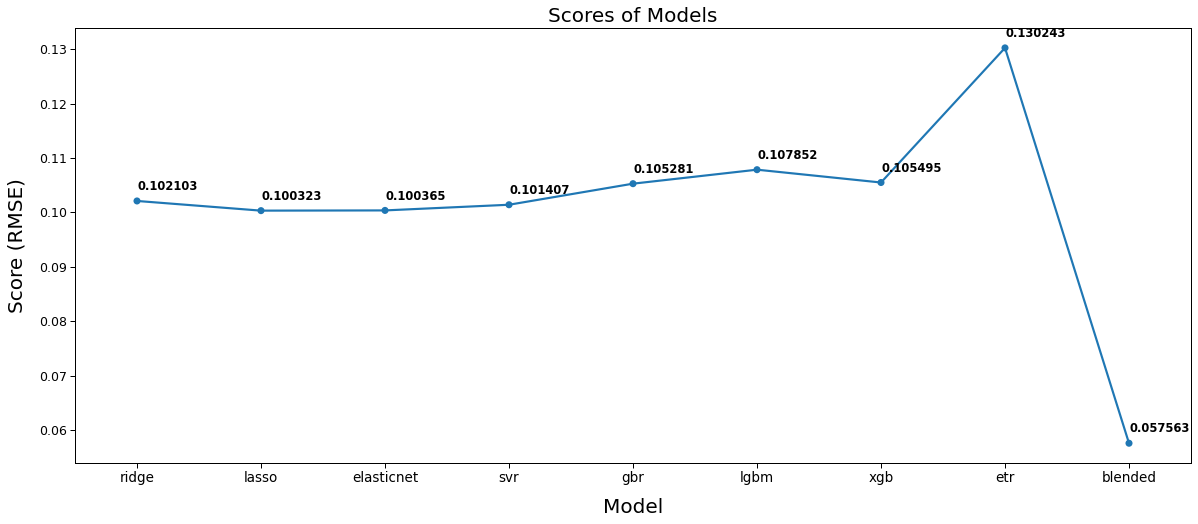

In [67]:
# Plot the predictions for each model
#sns.set_style("white")
fig = plt.figure(figsize=(20, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [68]:
print('Prediction_Submission')
submission = submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(Z_test)))

Prediction_Submission


In [69]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("./submission_prediction.csv", index=False)